# Explore here

In [50]:
# Your code here

# Paso 1: Carga del conjunto de datos

import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

data.head(5)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [51]:
X = data[["Latitude", "Longitude", "MedInc" ]]

X.shape

(20640, 3)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)

X_train.head()
# X_train.shape

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542


In [53]:
# Paso 2: Construye un K-Means de 6 clusters
from sklearn.cluster import KMeans


model_kmeans = KMeans(n_clusters=6 ,random_state = 42, n_init="auto")

model_kmeans.fit(X_train)
# model_kmeans.fit(X_test)


KMeans(n_clusters=6, random_state=42)

In [54]:

y_train = list(model_kmeans.labels_)
X_train["Cluster"] = y_train
X_train = X_train[["Latitude", "Longitude", "MedInc", "Cluster" ]]
X_train.head()



,Latitude,Longitude,MedInc,Cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5


<Axes: xlabel='Longitude', ylabel='MedInc'>

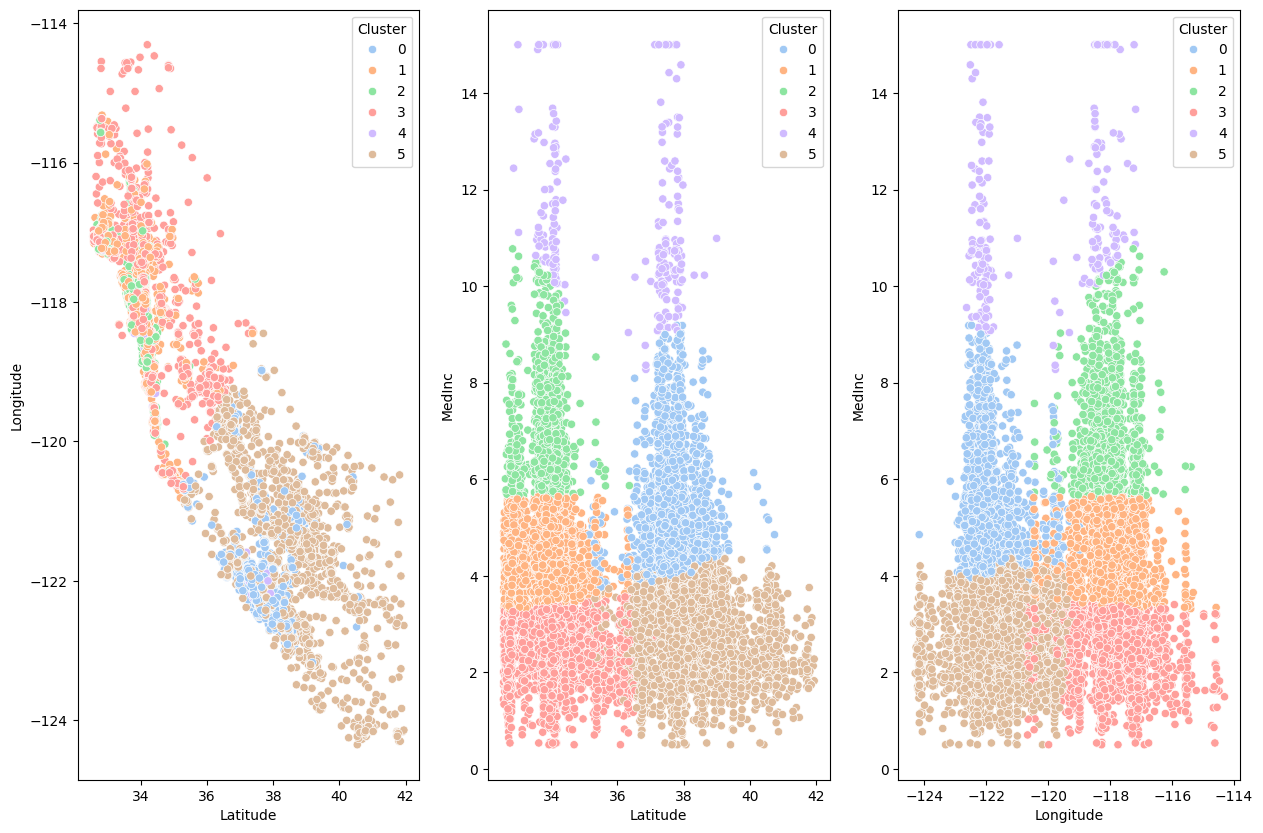

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (15, 10))

sns.scatterplot(ax = axis[0], data=X_train, x="Latitude", y="Longitude", hue="Cluster", palette="pastel")
sns.scatterplot(ax = axis[1], data=X_train, x="Latitude", y="MedInc", hue="Cluster", palette="pastel")
sns.scatterplot(ax = axis[2], data=X_train, x="Longitude", y="MedInc", hue="Cluster", palette="pastel")



In [41]:
# model_kmeans.fit(X_test)
# predict = model_kmeans.predict(X_test)

KMeans(n_clusters=6, random_state=42)

In [56]:
# Paso 3: Predice con el conjunto de test


y_test = model_kmeans.predict(X_test)
X_test["Cluster"] = y_test
X_test.head()

,Latitude,Longitude,MedInc,Cluster
20046,36.06,-119.01,1.6812,3
3024,35.14,-119.46,2.5313,3
15663,37.80,-122.44,3.4801,5
20484,34.28,-118.72,5.7376,2
9814,36.62,-121.93,3.7250,5


<Axes: xlabel='Longitude', ylabel='MedInc'>

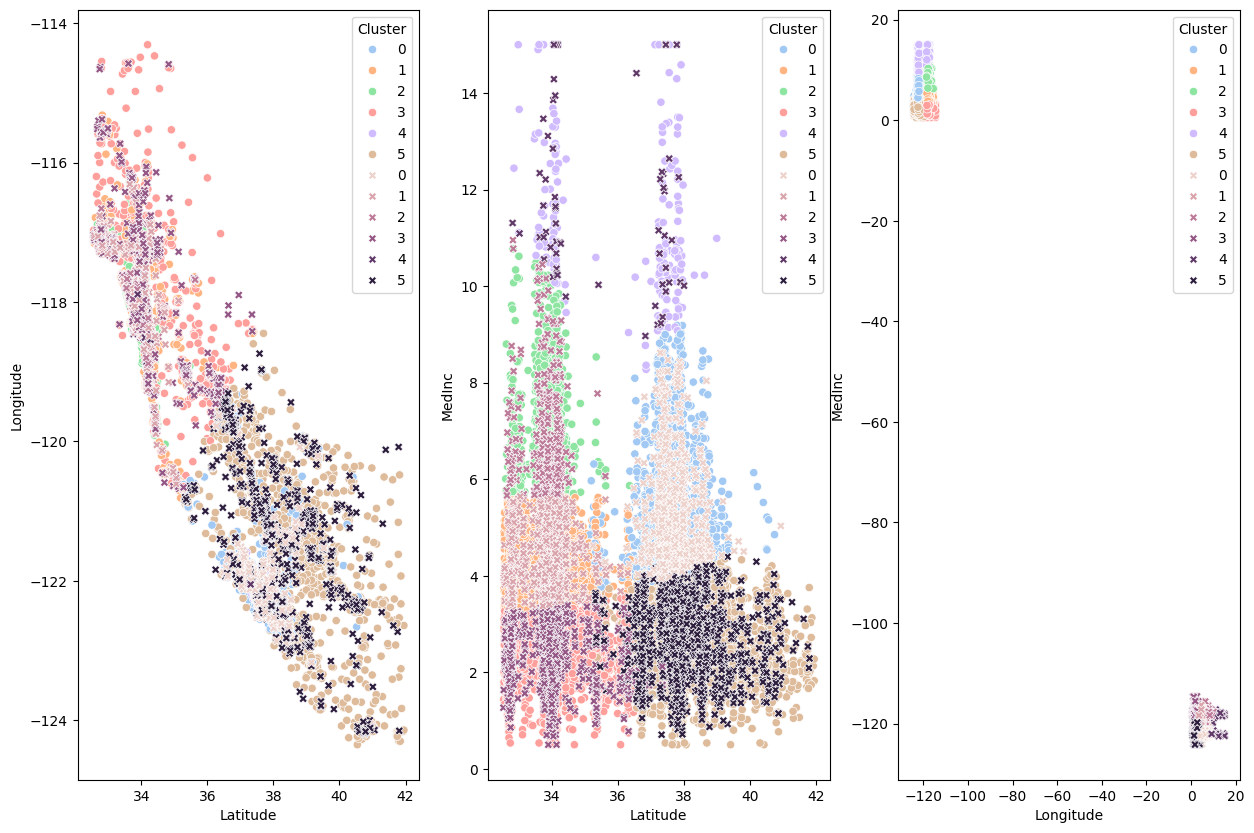

In [57]:
fig, axis = plt.subplots(1, 3, figsize = (15, 10))

sns.scatterplot(ax = axis[0], data=X_train, x="Latitude", y="Longitude", hue="Cluster", palette="pastel")
sns.scatterplot(ax = axis[1], data=X_train, x="Latitude", y="MedInc", hue="Cluster", palette="pastel")
sns.scatterplot(ax = axis[2], data=X_train, x="Longitude", y="MedInc", hue="Cluster" ,palette="pastel")

sns.scatterplot(ax = axis[0], data=X_test, x="Latitude", y="Longitude", hue="Cluster", marker="X")
sns.scatterplot(ax = axis[1], data=X_test, x="Latitude", y="MedInc", hue="Cluster", marker="X")
sns.scatterplot(ax = axis[2], data=X_test, x="MedInc", y="Longitude", hue="Cluster", marker="X")

In [58]:
# Paso 4: Entrena un modelo de clasificación supervisada

from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
y_pred_knn = model_knn.predict(X_test)
y_pred_knn

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

In [60]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_knn)

1.0

In [15]:
# Paso 5: Guarda los modelos

from pickle import dump

dump(model_kmeans, open("Kmeans_classifier_default_42.sav", "wb"))
dump(model_knn, open("Knn_classifier_default_42.sav", "wb"))